In [33]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/README.TXT
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/361.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/245.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/141.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/372.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/333.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/276.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/244.txt
/kaggle/input/bbc-full-text-document-classification/bbc-fulltext (document classification)/bbc/politics/175.tx

# About dataset
1. this is fully text dataset
2. we have one root folder named bbc under bbc folder there are 5 more folders containing diffrent number of articles
1. business
2. entertainment
3. politics
4. sports
5. tech
3. we need to convert this text data into vector form

# TF-IDF
TF-IDF, which stands for term frequency — inverse document frequency, is a scoring measure widely used in information retrieval (IR) or summarization. TF-IDF is intended to reflect how relevant a term is in a given document.

The intuition behind it is that if a word occurs multiple times in a document, we should boost its relevance as it should be more meaningful than other words that appear fewer times (TF).

At the same time, if a word occurs many times in a document but also along many other documents, maybe it is because this word is just a frequent word; not because it was relevant or meaningful (IDF).

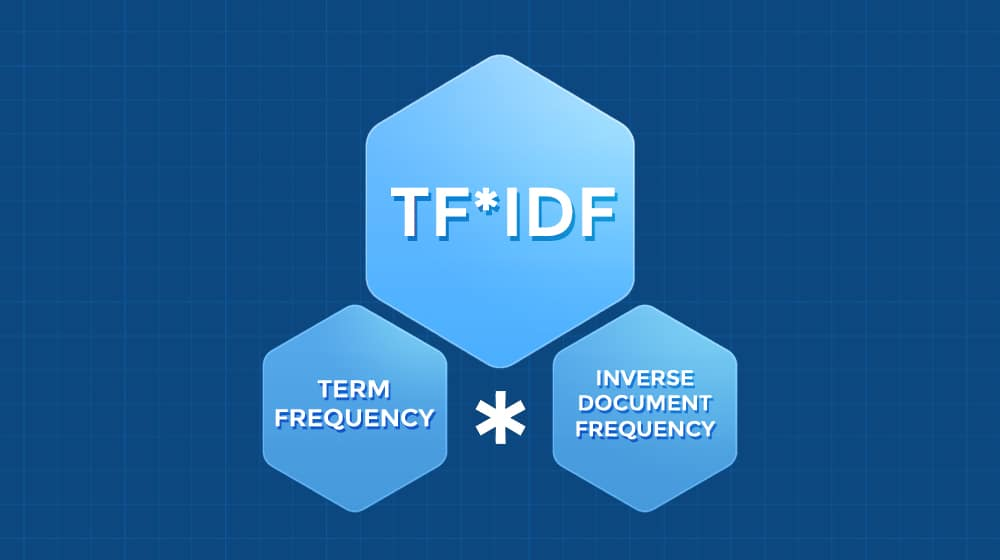

# 1. Import Libraries

In [34]:
import warnings
from collections import OrderedDict
from pathlib import Path
from random import randint
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.model_selection import train_test_split
import joblib

# Iteratively read files
import glob
import os

# For displaying images in ipython
from IPython.display import HTML, display

In [35]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14.0, 8.7)
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format

# 2. Load data

In [40]:
# User defined function to read and store bbc data from multipe folders
def load_data(folder_names,root_path):
    fileNames = [path  + "/" + 'bbc' +'/'+ folder + '/*.txt' for path,folder in zip([root_path]*len(folder_names),
                                                                               folder_names )]
    doc_list = []
    topic = folder_names
    for docs in fileNames:
        #print(docs)
        #print(type(docs))
        doc = glob.glob(docs) # glob method iterates through the all the text documents in a folder
        for text in doc:
            with open(text, encoding='latin1') as f:
                topic = docs.split('/')[len(docs.split('/'))-2]

                lines = f.readlines()
                heading = lines[0].strip()
                body = ' '.join([l.strip() for l in lines[1:]])
                doc_list.append([topic, heading, body])
        print("Completed loading data from folder: %s"%topic)
    
    print("Completed Loading entire text")
    
    return doc_list

In [58]:
os.getcwd().split()

['/kaggle/working']

In [59]:

folder_names = ['business','entertainment','politics','sport','tech']
docs = load_data(folder_names = folder_names, root_path = os.getcwd())

Completed loading data from folder: business
Completed loading data from folder: entertainment
Completed loading data from folder: politics
Completed loading data from folder: sport
Completed loading data from folder: tech
Completed Loading entire text


In [60]:
docs = pd.DataFrame(docs, columns=['Category', 'Heading', 'Article'])
print(docs.head())
print('\nShape of data is {}\n'.format(docs.shape))



   Category                                   Heading  \
0  business                 US consumer confidence up   
1  business        The 'ticking budget' facing the US   
2  business          Mitsubishi in Peugeot link talks   
3  business           BMW reveals new models pipeline   
4  business  World leaders gather to face uncertainty   

                                             Article  
0   Consumers' confidence in the state of the US ...  
1   The budget proposals laid out by the administ...  
2   Trouble-hit Mitsubishi Motors is in talks wit...  
3   BMW is preparing to enter the market for car-...  
4   More than 2,000 business and political leader...  

Shape of data is (2225, 3)



# 3.Apply TfidfVectorizer

In [61]:
vectorizer = TfidfVectorizer(stop_words = "english")

In [62]:
vectors = vectorizer.fit_transform(docs["Heading"].values)
print("Shape of tfidf matrix: {}".format(vectors.shape))

Shape of tfidf matrix: (2225, 3623)


# 4. Use cosine similarity for finding similar documents

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

In [74]:
new_query = ["World facing imminent danger across global war theaters"]
new_query_vector = vectorizer.transform(new_query)
new_query_vector

<1x3623 sparse matrix of type '<class 'numpy.float64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [75]:
sim = cosine_similarity(X = vectors, Y = new_query_vector)

In [76]:
sim

array([[0.        ],
       [0.32021798],
       [0.        ],
       ...,
       [0.        ],
       [0.        ],
       [0.        ]])

In [77]:
# To Extract Top 10 Similar Documents against the new query
ind = np.argsort(sim,axis = 0)[::-1][:10]
for i in ind:
    print(docs["Heading"].values[i])

["The 'ticking budget' facing the US"]
["Singer Ferguson 'facing eviction'"]
['Spector facing more legal action']
["UK economy facing 'major risks'"]
['Big war games battle it out']
['Global release for Japan hit film']
['Bollywood draws global stars']
['Films on war triumph at Sundance']
["Global digital divide 'narrowing'"]
['The gaming world in 2005']


In [78]:
def retrieve_doc(new_query,raw_docs):
    vectorizer = TfidfVectorizer(stop_words = "english")
    vectors = vectorizer.fit_transform(raw_docs["Article"])
    print("Shape of tfidf matrix: {}".format(vectors.shape))
    new_query = [new_query]
    new_query_vector = vectorizer.transform(new_query)
    sim = cosine_similarity(X = vectors, Y = new_query_vector)
    ind = np.argsort(sim,axis = 0)[::-1][:10]
    for i in ind:
        print(docs["Heading"].values[i])

# 5.search for any information

In [83]:
newQuery = "economic crises"

In [84]:
retrieve_doc(new_query= newQuery  , raw_docs= docs)

Shape of tfidf matrix: (2225, 28980)
['Asia shares defy post-quake gloom']
['Newest EU members underpin growth']
['US consumer confidence up']
['Why few targets are better than many']
["Tokyo says deflation 'controlled'"]
['Markets signal Brazilian recovery']
["'Golden economic period' to end"]
['Consumers drive French economy']
['Asia shares defy post-quake gloom']
['Bank set to leave rates on hold']


# Conclusion
1. we have all text data with us in diffrent folders, we use TfidfVectorizer for converting this text data into matrix form
2. then we use cosine similarity methode for finding articles or documents similar to information or query given by user which he/she want to search.
3. this is a example of simple search engine or document similarity.